<a href="https://colab.research.google.com/github/TorbjornLarsson/SCDA/blob/main/Miniproject_1_SDE_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Miniproject 1, task 1: Numerical simulation (SDE approach)

Extend your Python code from Task 1 to include a continuous point source. Use the two-dimensional domain Ω = [0, 25]×[−5, 5], with source location xs = (0, 0), emission rate Q = 100 particles per second, diffusion coefficient D = 0.02, and velocity field u = [0.3, 0].

Initialize with no particles (N(0) = 0) and simulate up to a final time of T = 60 seconds. Visualize the resulting particle clouds at t = 15, 30, 45, and 60
seconds.

In [15]:
# Include a continuous point source. Use the two-dimensional domain
# Ω = [0, 25]×[−5, 5], with source location xs = (0, 0), emission
# rate Q = 100 particles per second, diffusion coefficient D = 0.02,
# and velocity field u = [0.3, 0].
# Initialize with no particles (N(0) = 0) and simulate up to a final time
# of T = 60 seconds. Visualize the resulting particle clouds
# at t = 15, 30, 45, and 60 seconds.

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Computational domain Ω = [0, 25] × [−5, 5] (rectangle)
x_domain = [0, 25]
y_domain = [-5, 5]

# Source location
xs = np.array([0.0, 0.0]) # Source location (2D)

# Emission rate
Q = 100 # particles per second

# Constant parameters
D = 0.02               # Diffusion coefficient (scalar)
u = np.array([0.3, 0.0]) # Advective velocity in x-direction (2D)

# Simulation parameters
T = 60.0               # Total simulation time
h = 0.1                # Time step (assumed from previous examples)

# Initial number of particles
N0 = 0 # No initial particles

print(f"Computational Domain X: {x_domain}")
print(f"Computational Domain Y: {y_domain}")
print(f"Source Location (xs): {xs}")
print(f"Emission Rate (Q): {Q} particles/s")
print(f"Diffusion Coefficient (D): {D}")
print(f"Advective Velocity (u): {u}")
print(f"Total Simulation Time (T): {T} s")
print(f"Time Step (h): {h} s")
print(f"Initial Number of Particles (N0): {N0}")

Computational Domain X: [0, 25]
Computational Domain Y: [-5, 5]
Source Location (xs): [0. 0.]
Emission Rate (Q): 100 particles/s
Diffusion Coefficient (D): 0.02
Advective Velocity (u): [0.3 0. ]
Total Simulation Time (T): 60.0 s
Time Step (h): 0.1 s
Initial Number of Particles (N0): 0


In [17]:
def euler_maruyama_continuous_source(xs, Q, D, u, T, h):
    """
    Implements the Euler–Maruyama method with a continuous point source.

    Args:
        xs (np.ndarray): Source location (2D array).
        Q (float): Emission rate (particles per second).
        D (float): Diffusion coefficient (scalar).
        u (np.ndarray): Drift coefficient vector (2D array).
        T (float): Total simulation time.
        h (float): Time step.

    Returns:
        tuple: A tuple containing:
            - time_points (np.ndarray): Array of time points.
            - all_paths (list): A list where each element is an np.ndarray
                                containing positions of ALL active particles
                                at that specific time step.
    """
    num_steps = int(T / h)
    time_points = np.linspace(0, T, num_steps + 1)
    dimensions = len(xs)

    # Initialize with no particles
    current_particles_positions = np.empty((0, dimensions))
    all_paths = [current_particles_positions]  # Store initial state (empty)

    # Calculate number of new particles to emit per time step
    num_emitted_per_step = int(Q * h)

    sqrt_2Dh = np.sqrt(2 * D * h)

    for i in range(num_steps):
        # 1. Add new particles from the source
        if num_emitted_per_step > 0:
            new_particles_positions = np.tile(xs, (num_emitted_per_step, 1))
            current_particles_positions = np.vstack((current_particles_positions, new_particles_positions))

        # 2. Update positions of all active particles
        if current_particles_positions.shape[0] > 0:
            N_active_particles = current_particles_positions.shape[0]
            dW = np.random.normal(0, 1, (N_active_particles, dimensions))

            # Euler-Maruyama update rule: Xn+1 = Xn + u*h + √(2D*h)*dW
            current_particles_positions = current_particles_positions + u * h + sqrt_2Dh * dW

        # Store the positions of all active particles at the current time step
        # Make a copy to avoid modification issues during the next iteration
        all_paths.append(current_particles_positions.copy())

    return time_points, all_paths

In [18]:
# xs = np.array([0.0, 0.0]) # Source location (2D)
# Q = 100 # particles per second
# D = 0.02               # Diffusion coefficient (scalar)
# u = np.array([0.3, 0.0]) # Advective velocity in x-direction (2D)
# T = 60.0               # Total simulation time
# h = 0.1                # Time step

# Run the simulation with continuous source
time_points_cs, paths_cs = euler_maruyama_continuous_source(xs, Q, D, u, T, h)

print(f"Number of time points: {len(time_points_cs)}")
print(f"Total number of particle states stored (including initial empty state): {len(paths_cs)}")

# Print shapes of particle arrays at a few time points
print("\nShape of particles at selected time steps:")
selected_indices = np.linspace(0, len(paths_cs) - 1, 5, dtype=int)
for idx in selected_indices:
    print(f"  Time {time_points_cs[idx]:.1f} s (index {idx}): {paths_cs[idx].shape} particles")


Number of time points: 601
Total number of particle states stored (including initial empty state): 601

Shape of particles at selected time steps:
  Time 0.0 s (index 0): (0, 2) particles
  Time 15.0 s (index 150): (1500, 2) particles
  Time 30.0 s (index 300): (3000, 2) particles
  Time 45.0 s (index 450): (4500, 2) particles
  Time 60.0 s (index 600): (6000, 2) particles


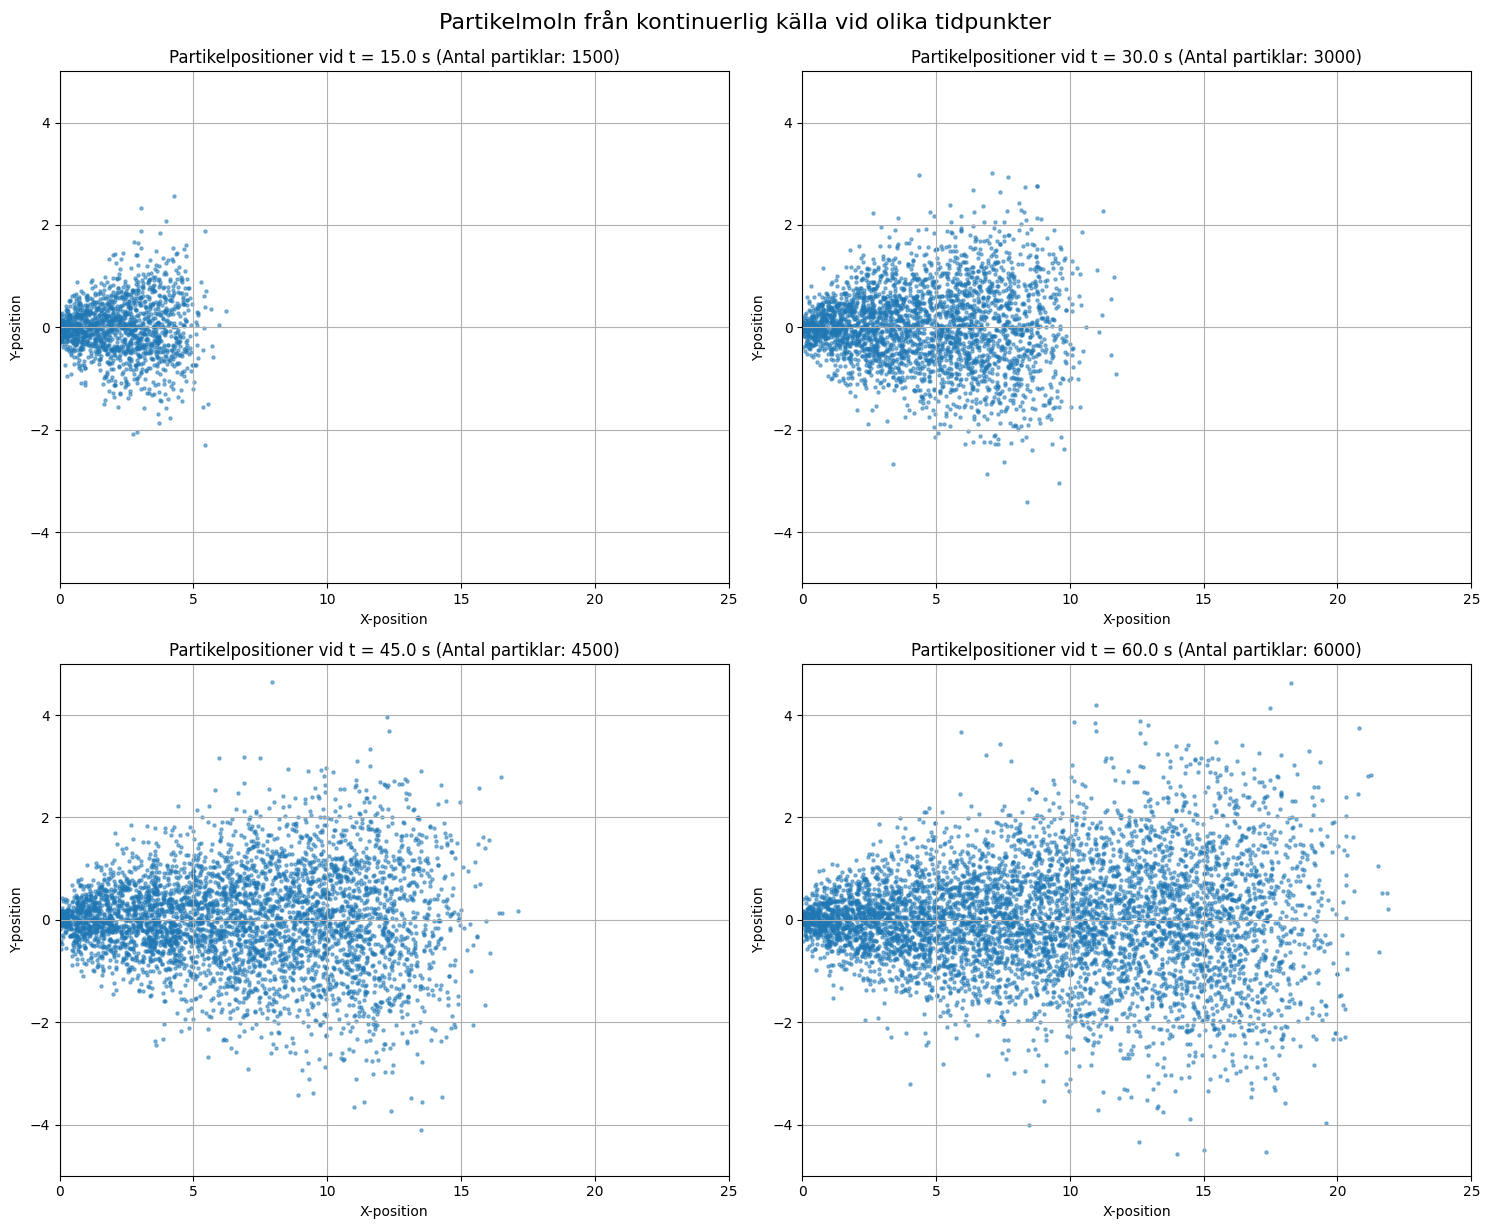

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Define the time levels for plotting
time_levels_cs = [15.0, 30.0, 45.0, 60.0]

# Create a figure with 2x2 subplots
fig_cs, axes_cs = plt.subplots(2, 2, figsize=(15, 12))
axes_cs = axes_cs.flatten() # Flatten the 2x2 array of axes for easier iteration

# Define common axis limits based on the computational domain Ω = [0, 25] × [−5, 5]
x_lim_cs = [0, 25]
y_lim_cs = [-5, 5]

for i, t_level_cs in enumerate(time_levels_cs):
    # Find the index for the current time level in time_points_cs
    # Use np.argmin to find the closest time point if exact match is not found
    t_index_cs = np.argmin(np.abs(time_points_cs - t_level_cs))

    # Extract particle positions at this time level from paths_cs
    # paths_cs is a list of arrays, so we access it directly
    positions_at_t_cs = paths_cs[t_index_cs]

    # Plot on the current subplot only if there are particles to plot
    if positions_at_t_cs.shape[0] > 0:
        axes_cs[i].scatter(positions_at_t_cs[:, 0], positions_at_t_cs[:, 1], alpha=0.5, s=5)
    else:
        axes_cs[i].text(0.5, 0.5, 'No particles yet', horizontalalignment='center', verticalalignment='center', transform=axes_cs[i].transAxes, fontsize=12)

    axes_cs[i].set_title(f'Partikelpositioner vid t = {time_points_cs[t_index_cs]:.1f} s (Antal partiklar: {positions_at_t_cs.shape[0]})')
    axes_cs[i].set_xlabel('X-position')
    axes_cs[i].set_ylabel('Y-position')
    axes_cs[i].grid(True)

    # Set common axis limits for all subplots
    axes_cs[i].set_xlim(x_lim_cs)
    axes_cs[i].set_ylim(y_lim_cs)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.suptitle('Partikelmoln från kontinuerlig källa vid olika tidpunkter', y=1.02, fontsize=16) # Overall title
plt.show()